# Exercise - Create a Router with LangGraph - SOLUTION

In this exercise, you will build a router using LangGraph to dynamically control the flow of your application.

**Challenge**

You're building a text processing application that can:

- Reverse a string (e.g., "hello" → "olleh")
- Convert a string to uppercase (e.g., "hello" → "HELLO")

Your application should:

- Accept user input and an action type.
- Route to the appropriate node (reverse or upper) based on the action.
- Handle invalid actions gracefully.

This will be achieved by routing the input through LangGraph nodes using a conditional edge.

## 0. Import the necessary libs

In [ ]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

## 1. State Schema

We’ll use Python’s TypedDict to define the structure of our state:

- input: The user’s input string.
- action: The action to be performed (reverse or upper).
- output: The processed output.

Then initialize the State Graph with the state schema you have created

In [20]:
# FILL IN - The State Schema class
class State(TypedDict):
    input: str
    action: Literal["reverse", "upper"]
    output: str

In [21]:
workflow = StateGraph(State)

## 2. Nodes

Create the logics in your nodes.
- Node A should reverse the input
- Node B should convert input to uppercase

The add the nodes to the workflow.

In [22]:
def node_a(state: State):
    print("Node A\n")
    # FILL IN - Reverse
    output =  state['input'][::-1]
    print(f"output: {output}")
    return {"output": output}

In [23]:
def node_b(state: State):
    print("Node B\n")
    # FILL IN - Uppercase
    output = state['input'].upper()
    print(f"output: {output}")
    return {"output": output}

In [ ]:
# FILL IN - Add node A to the workflow
workflow.add_node(node_a)

In [24]:
# FILL IN - Add node B to the workflow
workflow.add_node(node_b)

## 3. Routing Function

Create a routing function to determine which node to execute based on the action. If action is reverse, it should return node A, if action is upper, node B.


In [25]:
# FILL IN - The routing function
def routing_function(state: State):
    action = state["action"]
    if action == "reverse":
        return "node_a"
    if action == "upper":
        return "node_b"        

## 4. Edges

Use conditional edges to control the flow of data:

- START → routing_function to decide the path.
- node_a → END for reverse.
- node_b → END for uppercase.

In add_conditional_edges() method, use source, path and path_map as the necessary arguments for routing.

In [26]:
# FILL IN - Add your condital edges
workflow.add_conditional_edges(
    source=START, 
    path=routing_function, 
    path_map=["node_a", "node_b"]
)

In [27]:
workflow.add_edge("node_a", END)
workflow.add_edge("node_b", END)

## 5. Compile and Run

Compile the graph, display and run it with different actions.

In [28]:
graph = workflow.compile()

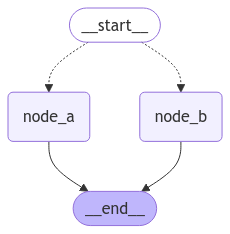

In [ ]:
display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)

In [30]:
# FILL IN - Input upper action
graph.invoke(
    input = {
        "input": "Some input",
        "action": "upper",
    }, 
)

Node B

output: SOME INPUT


{'input': 'Some input', 'action': 'upper', 'output': 'SOME INPUT'}

In [31]:
# FILL IN - Input reverse action
graph.invoke(
    input = {
        "input": "Some input",
        "action": "reverse",
    }, 
)

Node A

output: tupni emoS


{'input': 'Some input', 'action': 'reverse', 'output': 'tupni emoS'}

## 6. Break Things

Now that you understood how it works, experiment new things.
- Test different scenarios, like passing "lower" as the actions
- Make it more robust when this cases happen
- Add more actions